In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Insurance.csv')

In [3]:
df.head()

,POLICY_NO,PI_NAME,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,REASON_FOR_CLAIM,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS
0,101,A111111,M,"60,000",West,Annual,NON EARLY,Proprietor,NON MEDICAL,Gujarat,Cancer,52,"96,000",Approved Death Claim
1,102,A111112,M,"500,000",AGENCY,Annual,NON EARLY,Proprietor,NON MEDICAL,Madhya Pradesh,NaN,56,"500,000",Repudiate Death
2,103,A111113,M,"300,000",AGENCY,Annual,NON EARLY,Business,NON MEDICAL,Andhra Pradesh,COVID 19,51,0,Approved Death Claim
3,104,A111114,F,"1,000,000",AGENCY,Annual,EARLY,Homemaker,NON MEDICAL,Andhra Pradesh,NaN,52,0,Approved Death Claim
4,105,A111115,M,"10,000,000",RAJASTAN,Annual,EARLY,Banker,NON MEDICAL,Madhya Pradesh,Accidental,26,0,Approved Death Claim


In [4]:
# Prints number of null values for each column
df.isnull().sum()

POLICY_NO             0
PI_NAME               0
PI_GENDER             0
SUM_ASSURED           0
ZONE                  0
PAYMENT_MODE          0
EARLY_NON             0
PI_OCCUPATION       118
MEDICAL_NONMED        0
PI_STATE              0
REASON_FOR_CLAIM    432
PI_AGE                0
PI_ANNUAL_INCOME      0
POLICY_STATUS       215
dtype: int64

In [5]:
df.shape

(2005, 14)

In [ ]:
#df['POLICY_STATUS'].fillna(df['POLICY_STATUS'].value_counts().idxmax(), inplace=True)

In [6]:
df['PI_OCCUPATION'].fillna(df['PI_OCCUPATION'].value_counts().idxmax(), inplace=True)

In [7]:
df.isnull().sum()

POLICY_NO             0
PI_NAME               0
PI_GENDER             0
SUM_ASSURED           0
ZONE                  0
PAYMENT_MODE          0
EARLY_NON             0
PI_OCCUPATION         0
MEDICAL_NONMED        0
PI_STATE              0
REASON_FOR_CLAIM    432
PI_AGE                0
PI_ANNUAL_INCOME      0
POLICY_STATUS       215
dtype: int64

In [9]:
dfn=df.drop(['POLICY_NO','PI_NAME','PI_ANNUAL_INCOME'],axis=1)

In [ ]:
#dfn=df.drop(['POLICY_NO','PI_NAME'],axis=1)

In [10]:
dfn.head()

,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,REASON_FOR_CLAIM,PI_AGE,POLICY_STATUS
0,M,"60,000",West,Annual,NON EARLY,Proprietor,NON MEDICAL,Gujarat,Cancer,52,Approved Death Claim
1,M,"500,000",AGENCY,Annual,NON EARLY,Proprietor,NON MEDICAL,Madhya Pradesh,NaN,56,Repudiate Death
2,M,"300,000",AGENCY,Annual,NON EARLY,Business,NON MEDICAL,Andhra Pradesh,COVID 19,51,Approved Death Claim
3,F,"1,000,000",AGENCY,Annual,EARLY,Homemaker,NON MEDICAL,Andhra Pradesh,NaN,52,Approved Death Claim
4,M,"10,000,000",RAJASTAN,Annual,EARLY,Banker,NON MEDICAL,Madhya Pradesh,Accidental,26,Approved Death Claim


In [11]:
dfn.isnull().sum()

PI_GENDER             0
SUM_ASSURED           0
ZONE                  0
PAYMENT_MODE          0
EARLY_NON             0
PI_OCCUPATION         0
MEDICAL_NONMED        0
PI_STATE              0
REASON_FOR_CLAIM    432
PI_AGE                0
POLICY_STATUS       215
dtype: int64

In [15]:
anshul = dfn

In [16]:
anshul['REASON_FOR_CLAIM'].fillna(anshul['REASON_FOR_CLAIM'].value_counts().idxmax(), inplace=True)

In [17]:
anshul.isnull().sum()

PI_GENDER             0
SUM_ASSURED           0
ZONE                  0
PAYMENT_MODE          0
EARLY_NON             0
PI_OCCUPATION         0
MEDICAL_NONMED        0
PI_STATE              0
REASON_FOR_CLAIM      0
PI_AGE                0
POLICY_STATUS       215
dtype: int64

In [18]:
anshuln = anshul.dropna(subset=['POLICY_STATUS']) #to drop row which is having null value in Policy status

In [19]:
anshuln.shape # anshuln is my training data which I will give input to the algorithm

(1790, 11)

In [20]:
anshultest=anshul[anshul.POLICY_STATUS.isnull()]

In [21]:
anshultest.shape

(215, 11)

In [22]:
X_test=anshultest.drop('POLICY_STATUS',axis=1)#creating test data by removing the test label

In [23]:
X_test.shape

(215, 10)

# Multi label encoding using for loop..!!!

In [24]:
objList = anshuln.select_dtypes(include = "object").columns
print (objList)

Index(['PI_GENDER', 'SUM_ASSURED', 'ZONE', 'PAYMENT_MODE', 'EARLY_NON',
       'PI_OCCUPATION', 'MEDICAL_NONMED', 'PI_STATE', 'REASON_FOR_CLAIM',
       'POLICY_STATUS'],
      dtype='object')


In [25]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    anshuln[feat] = le.fit_transform(anshuln[feat].astype(str))

print (anshuln.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PI_GENDER         1790 non-null   int32
 1   SUM_ASSURED       1790 non-null   int32
 2   ZONE              1790 non-null   int32
 3   PAYMENT_MODE      1790 non-null   int32
 4   EARLY_NON         1790 non-null   int32
 5   PI_OCCUPATION     1790 non-null   int32
 6   MEDICAL_NONMED    1790 non-null   int32
 7   PI_STATE          1790 non-null   int32
 8   REASON_FOR_CLAIM  1790 non-null   int32
 9   PI_AGE            1790 non-null   int64
 10  POLICY_STATUS     1790 non-null   int32
dtypes: int32(10), int64(1)
memory usage: 97.9 KB
None


<ipython-input-25-dd85962b93f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anshuln[feat] = le.fit_transform(anshuln[feat].astype(str))


In [26]:
anshuln.shape

(1790, 11)

In [27]:
X = anshuln.drop('POLICY_STATUS',axis=1)
y = anshuln['POLICY_STATUS']

In [28]:
print(X)

      PI_GENDER  SUM_ASSURED  ZONE  PAYMENT_MODE  EARLY_NON  PI_OCCUPATION  \
0             1          554    31             0          1             75   
1             1          498     0             0          1             75   
2             1          344     0             0          1             13   
3             0            1     0             0          0             46   
4             1           47    15             0          0             11   
...         ...          ...   ...           ...        ...            ...   
1998          1          680     0             0          1             75   
2001          1          369    24             4          1             80   
2002          0          385     0             1          1             83   
2003          1           10    23             1          0             14   
2004          0          498     0             0          1             12   

      MEDICAL_NONMED  PI_STATE  REASON_FOR_CLAIM  PI_AGE  
0   

In [29]:
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
1998    0
2001    0
2002    1
2003    1
2004    1
Name: POLICY_STATUS, Length: 1790, dtype: int32


In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify=y) # X is data and # y is label

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train) #training data and traget has been provided to the algorithm

knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy

In [ ]:
knn.score(X_test,y_test)

# Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)

#tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)#### what happened here? training of the algo/model starts here

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.755


In [32]:
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on testing set: 0.749


In [33]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.32920648 0.1794737  0.0436136  0.02061293 0.22958363
 0.01446012 0.11431535 0.03489298 0.0338412 ]


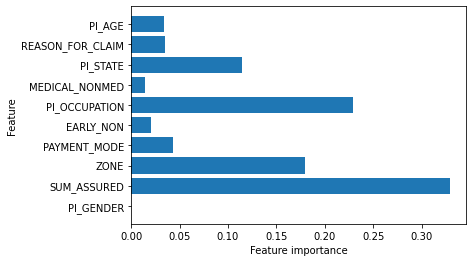

In [34]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.768


Feature importances:
[0.0217685  0.23427415 0.11366336 0.05105822 0.02735061 0.15508461
 0.01978685 0.12329397 0.09416363 0.1595561 ]


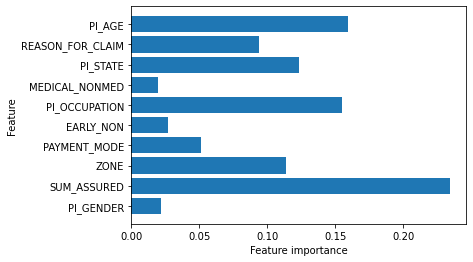

In [36]:
print("Feature importances:\n{}".format(forest.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate=0.1)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.777


Feature importances:
[0.00394709 0.37044999 0.12278951 0.05665717 0.006793   0.24231549
 0.01694689 0.07099017 0.03273705 0.07637365]


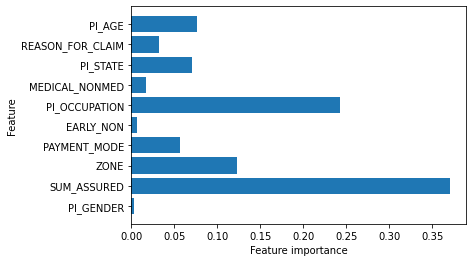

In [38]:
print("Feature importances:\n{}".format(gbrt.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_datas = scaler.transform(X)

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_datas,y,test_size=0.30,random_state=0)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,y_train1) #training data and traget has been provided to the algorithm
knn.score(X_test1,y_test1)

0.6852886405959032

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train1, y_train1)
tree.score(X_test1,y_test1)

0.7057728119180633

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)

gbrt.fit(X_train1, y_train1)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train1, y_train1)))

print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test1, y_test1)))

Accuracy on training set: 0.843
Accuracy on test set: 0.773
